In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import LinearSVC, SVC

In [2]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
plt.style.use('fivethirtyeight')

In [3]:
apples = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv', index_col=0)
apples.dropna(inplace=True)
apples['Acidity'] = apples['Acidity'].astype(np.float64)
apples['Quality'].replace({'good': 1, 'bad': 0}, inplace=True)

In [4]:
apples.head().style.background_gradient(cmap='Greens')

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0.000000,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1.000000,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2.000000,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3.000000,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4.000000,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [5]:
apples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0.0 to 3999.0
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


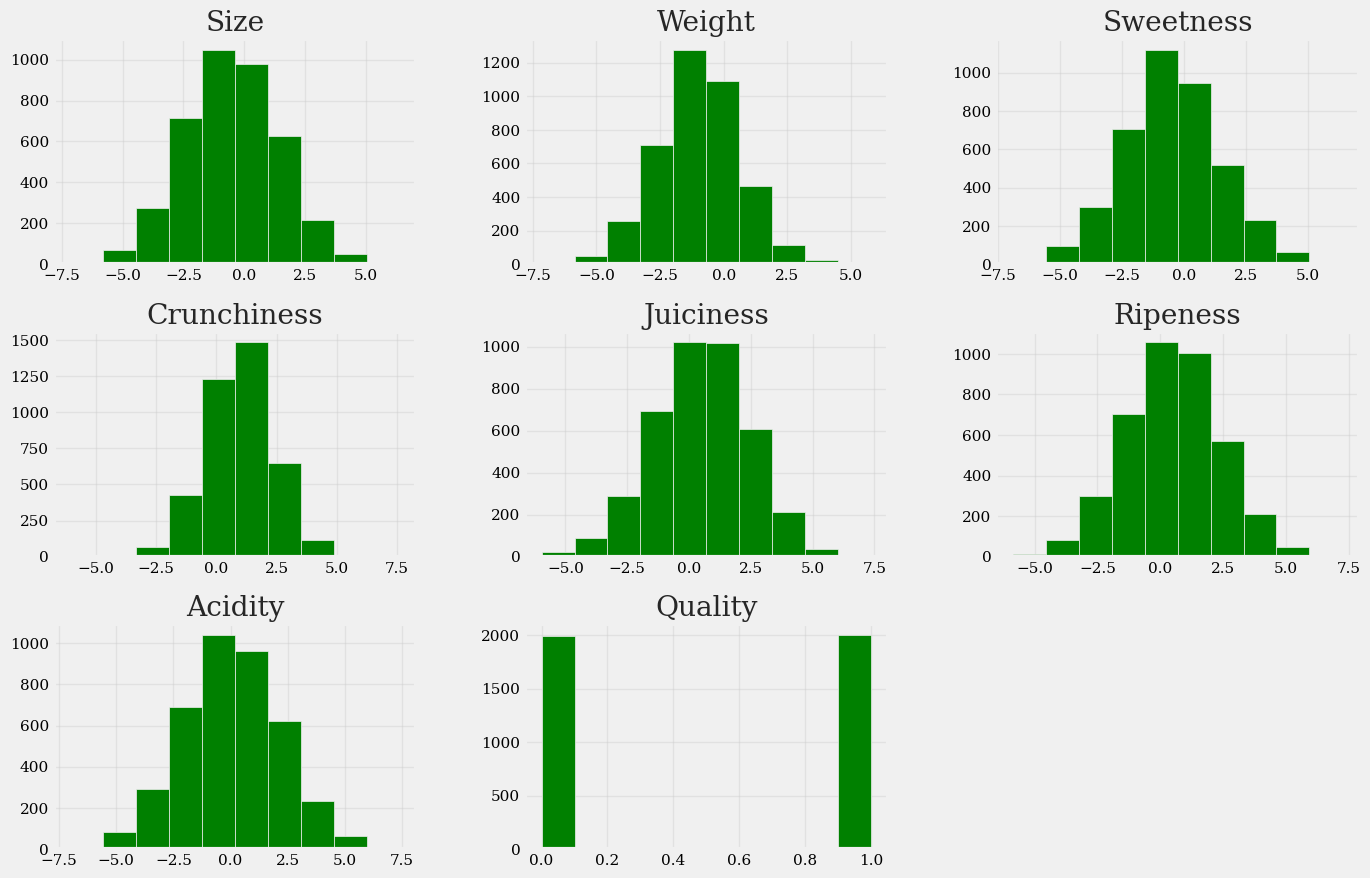

In [6]:
apples.hist(figsize=(15, 10), color='green');

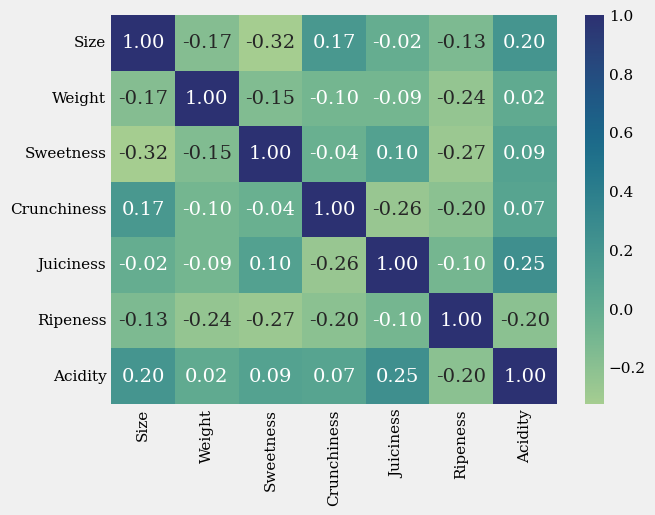

In [7]:
sns.heatmap(apples.drop('Quality', axis=1).corr(), cmap='crest',
            fmt='.2f', annot=True);

In [8]:
X = apples.drop('Quality', axis=1)
y = apples['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [9]:
scaler = StandardScaler()
models = [LinearSVC(C=100, loss='hinge', max_iter=int(1e7), random_state=42),
          LogisticRegression(random_state=42),
          SVC(C=10)]

for model in models:
    pipeline = make_pipeline(scaler, model)
    cv = KFold(n_splits=5, shuffle=True)
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print(f'CV scores for {type(model).__name__}: {cv_scores}')
    print(f'Mean of CV scores for {type(model).__name__}: {cv_scores.mean()}')

CV scores for LinearSVC: [0.76625 0.7475  0.745   0.72375 0.7525 ]
Mean of CV scores for LinearSVC: 0.747
CV scores for LogisticRegression: [0.765   0.74125 0.74375 0.755   0.73125]
Mean of CV scores for LogisticRegression: 0.74725
CV scores for SVC: [0.9025  0.91125 0.90375 0.895   0.9275 ]
Mean of CV scores for SVC: 0.908


In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for model in models:
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    print(f'{type(model).__name__} accuracy: {accuracy_score(y_test, y_pred)}')

LinearSVC accuracy: 0.755
LogisticRegression accuracy: 0.75
SVC accuracy: 0.93
